# Assignment 10

### 1.复习上课内容

### 2. 回答一下理论题目

#### 1. What is independent assumption in Naive bayes ?

假设p(a1, a2,...|+)的a1和a2等之间没有关联, 但实际有关联, 因为用全部的a1, a2, ...太稀疏, 所以只能用用P(a1|+)

#### 2. What is MAP(maximum a posterior) and ML(maximum likelihood) ?

MAP=P(D|h)*P(h)/P(D)

ML=P(D|h)
ML比MAP差个P(h), 如果所有发生的情况的p(h)一样, MAP = ML

#### 3. What is support vector in SVM?

α_i≠0, y_i * x_i * w + b = 0的点, 这些点落在最边缘的边界上, 这些点决定了SVM的边界

#### 4. What is the intuition behind SVM ?

如果是线性可分, 计算出两种情况, 一种是不用约束条件的, 如果这种情况的解在约束条件中, 就是成立的, 如果不在约束条件中, 就计算第二种情况, 用拉格朗日乘子法, 用KKT条件, 使拉格朗日乘子法具有强对偶性, 再用对偶性调换max min位置, 获得一个容易计算的min max L()函数, 计算出对w和b的偏导数, 为0的时候的值, 再代进拉格朗日函数中, 然后求最小值, 求最小值用SMO算法, 固定n-1个α, 对α进行迭代, 直到所有α都不变为止. 如果是线性不可分的, 用核函数, 映射到高位空间再求解

#### 5. Shortly describ what 'random' means in random forest ?

多颗树的样本的选择是随机的, 每棵树的可分裂的特征是从所有特征中随机选择的

#### 6. What cariterion does XGBoost use to find the best split point in a tree ?

还不是很理解, 过几天写上, 这几天看SVM算法花了太多时间了

### 3. Practial part

##### Problem description: In this part you are going to build a classifier to detect if a piece of news is published by the Xinhua news agency (新华社）.

#### Hints:

###### 1. Firstly, you have to come up with a way to represent the news. (Vectorize the sentence, you can find different ways to do so online)  

###### 2. Secondly,  pick a machine learning algorithm that you think is suitable for this task

In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [2]:
CN_news  = pd.read_csv('sqlResult_1558435.csv', encoding = 'GB18030')

In [3]:
# add label to separate 新华社 and 非新华社
import re
is_Xinhua_Agency = [1 if len(re.findall(r'新华社', str(CN_news.iloc[x]['source']))) > 0 else 0 for x in range(CN_news.shape[0])]
CN_news['label'] = is_Xinhua_Agency
CN_news.head()

,id,author,source,content,feature,title,url,label
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm,0
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm,0
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm,0
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....,1
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...,0


In [4]:
import pandas as pd
import numpy as np
import matplotlib
import os, time, json, requests
import _pickle as pickle
from gensim import models
from gensim.models.word2vec import LineSentence, Word2Vec
import jieba, re
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine
% matplotlib inline


UsageError: Line magic function `%` not found.


这是上次我做项目1的时候的词向量的时候的模型, 就不再重新训练一遍了

In [5]:
model = Word2Vec.load('../Lecture5/word2vec.model')

In [6]:
vlookup = model.wv.vocab  # Gives us access to word index and count
Z = 0
for k in vlookup:
    Z += vlookup[k].count # Compute the normalization constant Z

def get_sentenses_vector(sentences, model=model, alpha=1e-3, Z=Z):
    def sif_embeddings(sentences, model, alpha=alpha, Z=Z):

        vlookup = model.wv.vocab  # Gives us access to word index and count
        vectors = model.wv        # Gives us access to word vectors
        size = model.vector_size  # Embedding size

        output = []

        # Iterate all sentences
        for s in sentences:
            count = 0
            v = np.zeros(size, dtype=np.float32) # Summary vector
            # Iterare all words
            for w in s:
                # A word must be present in the vocabulary
                if w in vlookup:
                    v += ( alpha / (alpha + (vlookup[w].count / Z))) * vectors[w]
                    count += 1 
            if count > 0:
                v /= count
            output.append(v)
        return np.vstack(output).astype(np.float32 )
    vector = sif_embeddings(sentences, model)
    pca = PCA(1)
    pca.fit(vector)
    u = pca.components_[0]
#     for i in range(len(vector)):
#         vector[i] -= np.multiply(np.multiply(u, u.T), vector[i])
    vector -= np.multiply(np.multiply(u, u.T), vector)
    return vector

In [7]:
csv_content = CN_news
csv_content
del csv_content['author']
del csv_content['feature']
del csv_content['url']


In [8]:
sentence_pattern = re.compile(r'[！？。…\r\n(?:\\n)]+')    
def get_all_list(content, title):
    if not (type(content) == str and type(title) == str):
        return (None, None, None)
    sentense = [jieba.lcut(el) for el in sentence_pattern.split(content)]
    title = jieba.lcut(title)
    content = jieba.lcut(content)
    return content, title, sentense

In [9]:
def calculate_knn_value(v_list):
    content_list = [el[0] for el in v_list]
    value_list = np.array([el[1] for el in v_list])
    value_start = (value_list[0] + value_list[1]) / 2
    value_end = (value_list[-1] + value_list[-2]) / 2
    value_list = (value_list[1: -1] + value_list[:-2] + value_list[2:]) / 3
    value_list = np.append(value_start, value_list)
    value_list = np.append(value_list, value_end)
    v_list = list(zip(content_list, value_list))
    return v_list

In [ ]:
vector = []
for i in range(len(csv_content)):
    content = (csv_content['content'][i])
    title = (csv_content['title'][i])
    content, title, sentense = get_all_list(content, title)
    if not content or not title or not sentense:
        vector.append(np.nan)
        continue
    v_content = get_sentenses_vector([content])
    v_title = get_sentenses_vector([title])
    v_target = (v_title + v_content) / 2
    vector.append(v_target)
    

In [63]:
csv_content['vector'] = vector

In [73]:
csv_content = csv_content[pd.notnull(csv_content['vector'])]

In [74]:
train_data, test_data = train_test_split(csv_content, test_size=0.2, random_state=1000)
print(train_data.shape)
print(test_data.shape)
train_X, train_Y = train_data['vector'], train_data['label']
test_X, test_Y = test_data['vector'], test_data['label']

(69643, 6)
(17411, 6)


In [75]:
train_X[:10]

68631    [[0.0, 0.32664466, 0.5596933, 1.2788314, -0.50...
44931    [[0.0, 0.8705988, 0.5848575, 0.5714029, -0.107...
14149    [[0.0, -0.2723934, 0.32359803, 1.6469542, 0.60...
64872    [[0.0, 0.28616774, 0.28030294, 1.686564, 0.775...
85883    [[0.0, 0.16440526, -0.27089387, 0.7712507, 0.2...
61521    [[0.0, -0.33938923, 0.3000905, -0.1128217, 0.5...
52703    [[0.0, 0.5849054, 0.6434822, 0.9597424, -0.456...
42802    [[0.0, 0.48360318, 0.75101614, 1.4283042, 0.27...
79506    [[0.0, 0.8758212, 0.37859175, 0.7275473, 0.321...
56372    [[0.0, -0.64831746, -0.41114897, 0.03699687, 0...
Name: vector, dtype: object

In [78]:
train_X = [train_X.iloc[x][0] for x in range(train_X.shape[0])]
train_Y = [train_Y.iloc[x] for x in range(train_Y.shape[0])]

test_X = [test_X.iloc[x][0] for x in range(test_X.shape[0])]
test_Y = [test_Y.iloc[x] for x in range(test_Y.shape[0])]

In [80]:
train_X[:40]

[array([ 0.        ,  0.32664466,  0.5596933 ,  1.2788314 , -0.5012623 ,
         0.15693165, -0.46017286,  0.6907327 , -0.28877047, -1.0251793 ,
        -0.09627237, -0.02117596, -0.778488  ,  0.34233052, -0.11864042,
         0.42366403,  0.79928625,  1.0809516 ,  0.6322367 , -0.26509178,
         0.2570668 , -0.4269567 , -0.51170045,  0.5324365 , -0.07241204,
         0.40272433, -0.921601  ,  0.25000325, -0.8634988 , -0.4451297 ,
        -0.9214184 ,  0.7361471 , -0.14221017,  0.19758794,  0.28151363,
         0.8212932 ,  0.17641121, -0.5229062 ,  0.41937953, -0.4959746 ,
        -0.64949316,  0.14341962,  0.09973976, -0.13153982,  0.46326885,
        -0.02303211, -0.7082359 ,  0.6194687 , -0.76728827, -0.35926056,
        -0.25250497,  0.2143215 ,  0.396015  ,  0.10498425, -0.4283259 ,
         0.19340748,  0.1621669 , -0.00995848,  0.22916152, -0.15858637,
        -0.28942716,  0.6784427 , -0.01449875,  1.0271884 , -0.32340533,
         0.8340044 ,  0.25974596, -0.55802536,  0.2

In [27]:
from sklearn.svm import SVC

In [81]:
clf = SVC(probability=True)
clf.fit(train_X, train_Y)

C:\Users\liuni\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [82]:
# predict y and probability
y_pred = clf.predict(test_X)
# y_pred = clf.decision_function(test_X)
y_pred_prob = clf.predict_proba(test_X)

In [83]:
# y_pred[:10]
# test_Y[:10]
print(y_pred[:10])
print(y_pred_prob[:10])
# compute accuracy
accuracy = sum([1 if test_Y[x] == y_pred[x] else 0 for x in range(len(test_Y))]) / len(test_Y)
accuracy #0.9605996209292975

[1 1 0 1 1 1 1 1 1 1]
[[1.36445636e-02 9.86355436e-01]
 [8.01554400e-11 1.00000000e+00]
 [9.92886555e-01 7.11344501e-03]
 [1.02909906e-06 9.99998971e-01]
 [2.92456644e-03 9.97075434e-01]
 [3.48643146e-06 9.99996514e-01]
 [1.46327826e-05 9.99985367e-01]
 [1.03602484e-07 9.99999896e-01]
 [1.22461367e-02 9.87753863e-01]
 [2.50676277e-02 9.74932372e-01]]


0.9605996209292975

AUPR =  0.9975719816404884
F1 Score =  0.9784520668425681


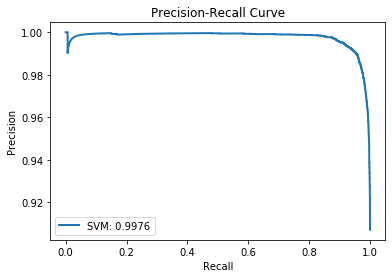

In [85]:
# PR-curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(test_Y, y_pred_prob[:,1])
AUPR = auc(recall, precision)
print('AUPR = ', AUPR)
F1_score = f1_score(test_Y, y_pred)
print('F1 Score = ', F1_score)
plt.plot(recall, precision, lw=2, label='SVM: ' + str(np.round(AUPR, 4)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.title('Precision-Recall Curve')
plt.show()

### Congratulations! You have completed all assignments in this week. The question below is optional. If you still have time, why don't try it out.

## Option:

#### Try differnt machine learning algorithms with different combinations of parameters in the practical part, and compare their performances (Better use some visualization techiniques).